In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()['data']

In [3]:
X = iris[:,0]
y = iris[:,3]

In [12]:
# Simple Linear Regression
class SimpleLinearRegression():
    def __init__(self):
      pass

    def fit(self, X, y):
       sum_X = sum(X)
       sum_y = sum(y)
       sum_xy = sum(np.multiply(X,y))
       sum_x2 = sum(np.multiply(X,X))
       self.n= len(X)
       self.m = ((self.n* sum_xy) - (sum_X * sum_y)) / ((self.n* sum_x2) - (sum_X**2))
       self.b = ((sum_y - (self.m * sum_X)) / self.n)
       self.MSE = ((1/self.n * sum(y - (self.m * np.array(X) + self.b))**2))
       self.SSR = sum((np.array(y) - (self.m * np.array(X) + self.b))**2)
       self.SST = sum((np.array(y) - (sum_y/self.n))**2)
       self.R2 = 1 - (self.SSR/self.SST)
    
    def predict(self, X):
        y = self.m * np.array(X) + self.b
        return y

In [13]:
slr = SimpleLinearRegression()
slr.fit(X,y)
print("Intercept: ", slr.b)
print("Slope: ", slr.m)
print("Mean Square Error: ", slr.MSE)
print("R-Squared: ", slr.R2)

Intercept:  -3.2002150046493556
Slope:  0.7529175706758736
Mean Square Error:  8.922049707254028e-29
R-Squared:  0.6690276860464137


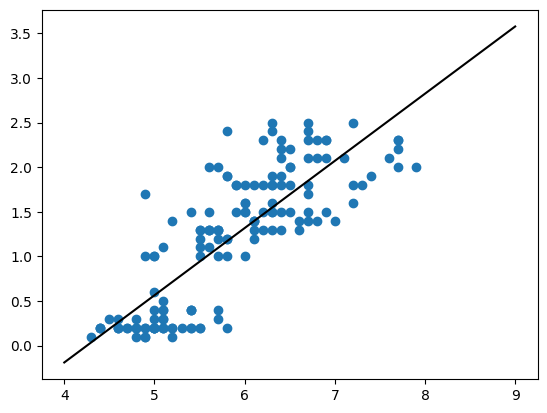

In [14]:
plt.scatter(X, y)
line_x = np.linspace(4,9, 100)
line_y = slr.m*line_x + slr.b 
plt.plot(line_x, line_y, color = "black")
plt.show()

In [17]:
class OLSLinearRegression():
    def __init__(self):
        pass
    
    def fit(self, X, y):
        # Adding column of 1's, beta_0
        x = np.hstack((np.ones((X.shape[0], 1)), X))
    
        self.beta = np.linalg.inv(x.T @ x) @ x.T @ y
        self.epsilon = np.array(y) - np.dot(x, self.beta)
        self.MSE = np.dot(self.epsilon.T, self.epsilon) / (X.shape[0] - (X.shape[1] + 1)) 
        self.SSE = np.dot(self.epsilon.T, self.epsilon)
        self.SST = sum((np.array(y) - sum(np.array(y))/y.shape[0])**2)
        self.R2 = 1 - self.SSE/self.SST
    
    def predict(self, X):
        prediction = np.dot(X, self.beta)
        return prediction

In [18]:
X = iris[:,:3]
y = iris[:, -1:]

In [19]:
o = OLSLinearRegression()
o.fit(X, y)
print("Mean Square Error: ", o.MSE[0][0])
print("R-Squared: ", o.R2[0][0])

Mean Square Error:  0.0368513539090937
R-Squared:  0.9378502736046809


In [20]:
# Linear Regression with gradient descent

class LinearRegression():

    def __init__(self, lr = 0.0001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * 2 *(np.dot(X.T, y_predicted - y))
            db = (1/n_samples) * 2 * sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * dw

    def predict(self, X):
        y = np.dot(X, self.weights) + self.bias
        return y